In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode
import warnings
warnings.filterwarnings("ignore")

test = pd.read_csv('aug_test.csv')
train = pd.read_csv('aug_train.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [9]:
sim = train.duplicated() 
sim.sum()

0

In [10]:
missing_value = 100 * train.isnull().sum()/len(train)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']

#import plotly.io as pio
#pio.templates.default = "none"


# heatmap
fig = px.imshow(train.isnull().T,template='ggplot2')
fig.update_layout(title='Missing values in data set')
fig.show()

# barplot
fig = px.bar(missing_value, y='missing values in percentage',x='variables',title='Missing values % in each column',
             template='ggplot2');
fig.show()

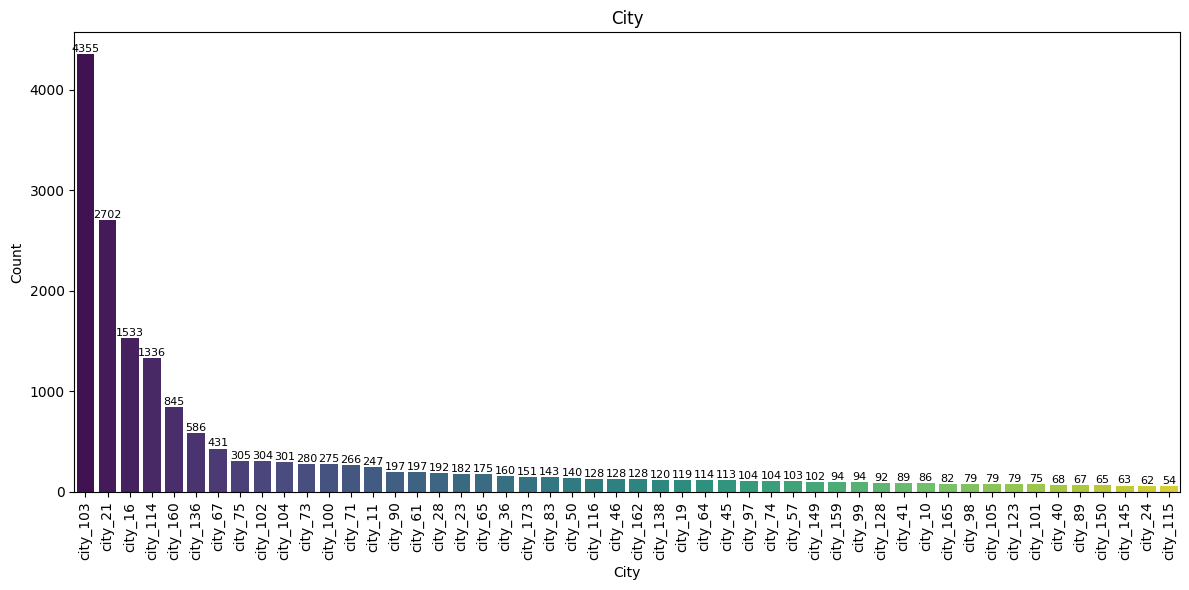

In [14]:

plot_city = train['city'].value_counts()[0:50].reset_index()
plot_city.columns = ['City', 'Count']
fig = px.bar(plot_city, x='City', y='Count', template='gridon', title='City', color='Count')
fig.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Count', data=plot_city, palette='viridis')
plt.title('City')
plt.xlabel('City')
plt.ylabel('Count')

for index, value in enumerate(plot_city['Count']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

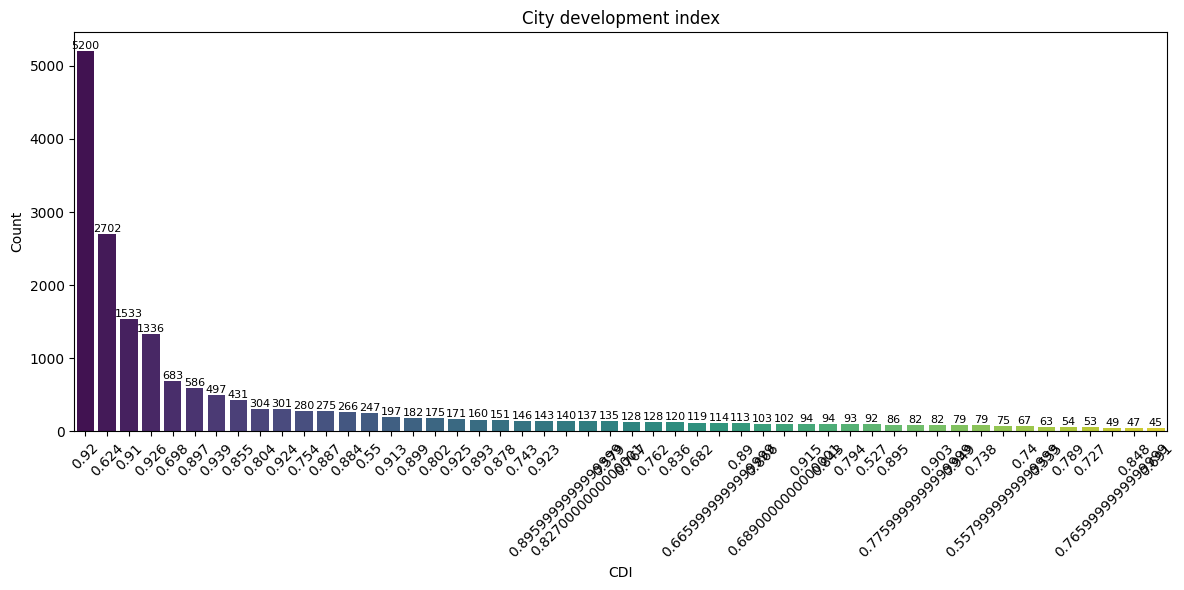

In [16]:
plot_cdi = train['city_development_index'].value_counts().reset_index()[0:50]
plot_cdi.columns = ['cdi', 'Count']
plot_cdi['cdi'] = plot_cdi['cdi'].astype(str)
fig = px.bar(plot_cdi, y="Count", x="cdi", color='Count', title='City development index')
fig.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='cdi', y='Count', data=plot_cdi, palette='viridis')
plt.title('City development index')
plt.xlabel('CDI')
plt.ylabel('Count')

for index, value in enumerate(plot_cdi['Count']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

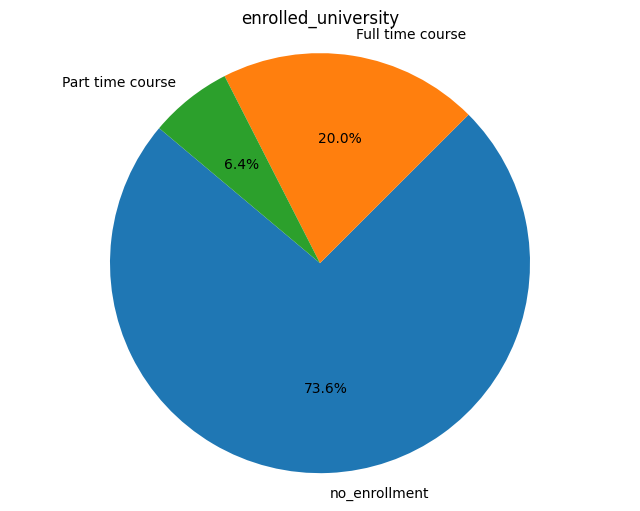

In [17]:
plot_gender = train['enrolled_university'].value_counts().reset_index()
plot_gender.columns = ['enrolled_university', 'count']
fig = px.pie(plot_gender, values='count', names='enrolled_university', template='simple_white', title='enrolled_university')
fig.show()

plt.figure(figsize=(8, 6))
plt.pie(plot_gender['count'], labels=plot_gender['enrolled_university'], autopct='%1.1f%%', startangle=140)
plt.title('enrolled_university')
plt.axis('equal')
plt.show()

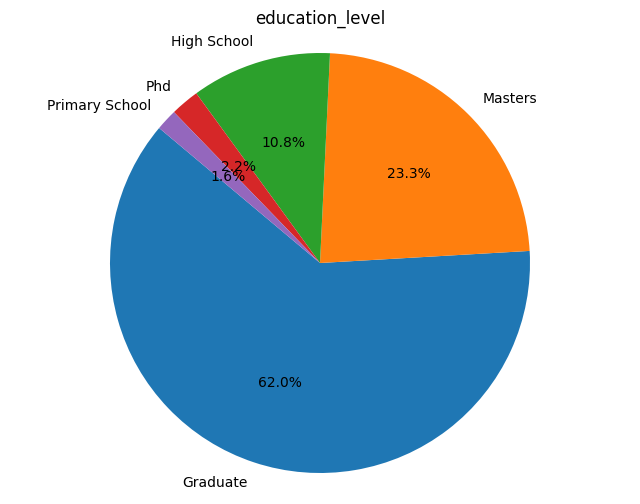

In [18]:
plot_gender = train['education_level'].value_counts().reset_index()
plot_gender.columns = ['education_level', 'count']
fig = px.pie(plot_gender, values='count', names='education_level', template='ggplot2', title='education_level')
fig.show()

plt.figure(figsize=(8, 6))
plt.pie(plot_gender['count'], labels=plot_gender['education_level'], autopct='%1.1f%%', startangle=140)
plt.title('education_level')
plt.axis('equal')
plt.show()

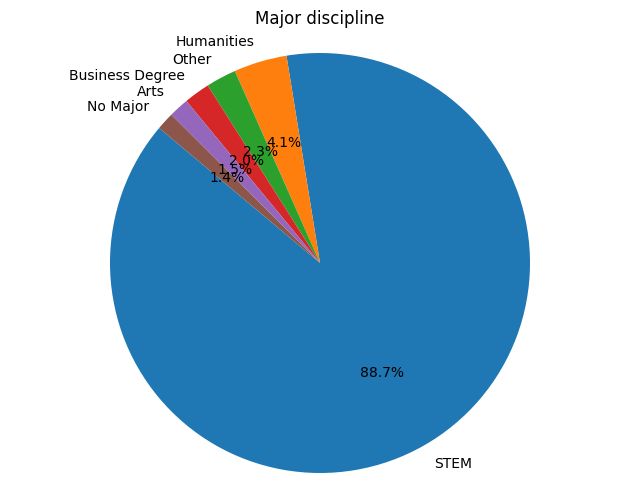

In [19]:
plot_gender = train['major_discipline'].value_counts().reset_index()
plot_gender.columns = ['major_discipline', 'count']
fig = px.pie(plot_gender, values='count', names='major_discipline', template='plotly', title='Major discipline')
fig.show()

plt.figure(figsize=(8, 6))
plt.pie(plot_gender['count'], labels=plot_gender['major_discipline'], autopct='%1.1f%%', startangle=140)
plt.title('Major discipline')
plt.axis('equal')
plt.show()

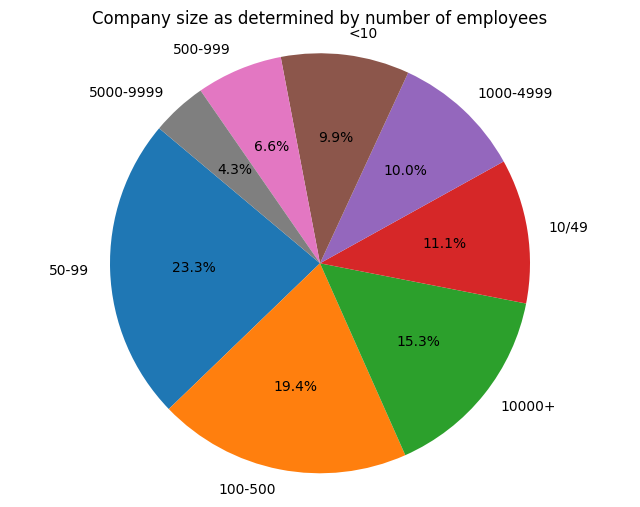

In [20]:
plot_gender = train['company_size'].value_counts().reset_index()
plot_gender.columns = ['company_size', 'count']
fig = px.pie(plot_gender, values='count', names='company_size', template='plotly_white', 
             title='Company size as determined by number of employees')
fig.show()

plt.figure(figsize=(8, 6))
plt.pie(plot_gender['count'], labels=plot_gender['company_size'], autopct='%1.1f%%', startangle=140)
plt.title('Company size as determined by number of employees')
plt.axis('equal')
plt.show()

## Zusammenfassung der HR-Datenvisualisierung

In diesem Skript haben wir Datenvisualisierungen für einen HR-Datensatz durchgeführt, um verschiedene Aspekte der Daten zu untersuchen.

### Fehlende Werte
Wir haben die Anzahl der fehlenden Werte in den Daten visualisiert, um die Datenqualität zu verstehen und zu entscheiden, wie wir fehlende Werte behandeln möchten.

### Städte
Wir haben die Verteilung der Städte visualisiert, in denen die Mitarbeiter arbeiten, um Einblicke in die geografische Verteilung und Konzentration von Mitarbeitern zu erhalten.

### Bildungsniveau
Die Verteilung der Bildungsniveaus der Mitarbeiter wurde visualisiert, um das Bildungsniveau der Belegschaft zu verstehen, was wichtige Informationen für Rekrutierungs- und Ausbildungsstrategien liefert.

### Hauptdisziplinen
Die Hauptdisziplinen der Mitarbeiter wurden visualisiert, um Einblicke in die fachliche Ausrichtung der Belegschaft zu gewinnen, was bei der Planung von Weiterbildungsprogrammen hilfreich sein kann.

### Unternehmensgrößen
Die Verteilung der Unternehmensgrößen basierend auf der Anzahl der Mitarbeiter wurde visualisiert, um zu verstehen, wie groß die Unternehmen sind, in denen die Mitarbeiter arbeiten. Dies kann Auswirkungen auf Unternehmenskultur, Arbeitsumfeld und Entwicklungsmöglichkeiten haben.

Diese Visualisierungen bieten einen Überblick über verschiedene Aspekte der HR-Daten und können als Ausgangspunkt für weitere Analysen dienen, um Erkenntnisse zu gewinnen, die HR-Entscheidungen unterstützen.
